In [1]:
import numpy as np                                     #importing numpy for multi dimension arrays and matrix
import pandas as pd                                    # importing pandas for data manipulation
import matplotlib.pyplot as plt                        # importing matplotib for plotting

In [2]:
data = pd.read_csv('train_cabbage_price.csv')
data.head()

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,20100101,-4.9,-11.0,0.9,0.0,2123
1,20100102,-3.1,-5.5,5.5,0.8,2123
2,20100103,-2.9,-6.9,1.4,0.0,2123
3,20100104,-1.8,-5.1,2.2,5.9,2020
4,20100105,-5.2,-8.7,-1.8,0.7,2060


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      2191 non-null   int64  
 1   avgTemp   2191 non-null   float64
 2   minTemp   2191 non-null   float64
 3   maxTemp   2191 non-null   float64
 4   rainFall  2191 non-null   float64
 5   avgPrice  2191 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 102.8 KB


In [4]:
data.describe()                                                           #descriptive statistics of data

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
count,2.191000e+03,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,2.013233e+07,12.877179,8.177910,18.279051,3.483934,3122.077590
std,2.409858e+04,9.733493,10.182253,9.745094,8.659659,1369.612599
min,2.010010e+07,-10.200000,-14.800000,-5.700000,0.000000,1093.000000
25%,2.011070e+07,4.200000,-0.850000,9.600000,0.000000,2202.000000
50%,2.012123e+07,14.000000,8.700000,20.000000,0.100000,2820.000000
75%,2.015070e+07,21.600000,17.300000,27.000000,2.200000,3745.500000
max,2.017123e+07,29.600000,25.500000,35.300000,95.500000,12410.000000


In [5]:
data.isnull().sum()                                            #checking of null values

year        0
avgTemp     0
minTemp     0
maxTemp     0
rainFall    0
avgPrice    0
dtype: int64

In [6]:
from datetime import datetime

In [7]:
data.year.min()                                                                        #minimum value of year in data

20100101

In [8]:
data.year.max()                                                                 #max value of year in data

20171231

In [9]:
data['year'] = data['year'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))        #Convert year column in date format

In [10]:
data.head()

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,2010-01-01,-4.9,-11.0,0.9,0.0,2123
1,2010-01-02,-3.1,-5.5,5.5,0.8,2123
2,2010-01-03,-2.9,-6.9,1.4,0.0,2123
3,2010-01-04,-1.8,-5.1,2.2,5.9,2020
4,2010-01-05,-5.2,-8.7,-1.8,0.7,2060


Text(0.5, 1.0, 'Cabbage Price')

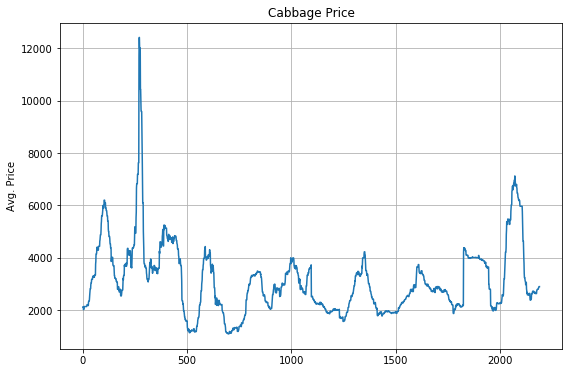

In [11]:
data.avgPrice.plot(figsize=(9,6),fontsize=10)
plt.grid()
plt.ylabel('Avg. Price')
plt.title('Cabbage Price')

In [12]:
X = data.iloc[:,:-1]                                       #slicing of data set and getting independent features

In [13]:
X.head()

,year,avgTemp,minTemp,maxTemp,rainFall
0,2010-01-01,-4.9,-11.0,0.9,0.0
1,2010-01-02,-3.1,-5.5,5.5,0.8
2,2010-01-03,-2.9,-6.9,1.4,0.0
3,2010-01-04,-1.8,-5.1,2.2,5.9
4,2010-01-05,-5.2,-8.7,-1.8,0.7


In [14]:
y = data[['avgPrice']]                                       #dependent feature

In [15]:
y.head()

,avgPrice
0,2123
1,2123
2,2123
3,2020
4,2060


In [16]:
#Extracting features from year column
X['Day'] = X.year.dt.day
X['Month'] = X.year.dt.month
X['Quarter'] = X.year.dt.quarter
X['Year'] = X.year.dt.year

In [17]:
X.head()

,year,avgTemp,minTemp,maxTemp,rainFall,Day,Month,Quarter,Year
0,2010-01-01,-4.9,-11.0,0.9,0.0,1,1,1,2010
1,2010-01-02,-3.1,-5.5,5.5,0.8,2,1,1,2010
2,2010-01-03,-2.9,-6.9,1.4,0.0,3,1,1,2010
3,2010-01-04,-1.8,-5.1,2.2,5.9,4,1,1,2010
4,2010-01-05,-5.2,-8.7,-1.8,0.7,5,1,1,2010


In [18]:
X_1 = X.iloc[:,1:]
X_1.head()

,avgTemp,minTemp,maxTemp,rainFall,Day,Month,Quarter,Year
0,-4.9,-11.0,0.9,0.0,1,1,1,2010
1,-3.1,-5.5,5.5,0.8,2,1,1,2010
2,-2.9,-6.9,1.4,0.0,3,1,1,2010
3,-1.8,-5.1,2.2,5.9,4,1,1,2010
4,-5.2,-8.7,-1.8,0.7,5,1,1,2010


In [19]:
from sklearn.model_selection import train_test_split                        #importing train test split
from sklearn.ensemble import RandomForestRegressor                          #importing random forest
from sklearn.metrics import mean_squared_error,mean_absolute_error          # importing error metrics

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_1, y, test_size=0.33, random_state=42)                         #spliting the data into training and test

In [21]:
RF = RandomForestRegressor().fit(X_train,y_train)                      #Calling and fitting random forest

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [22]:
RF_pred = RF.predict(X_test)                                           #predicting values

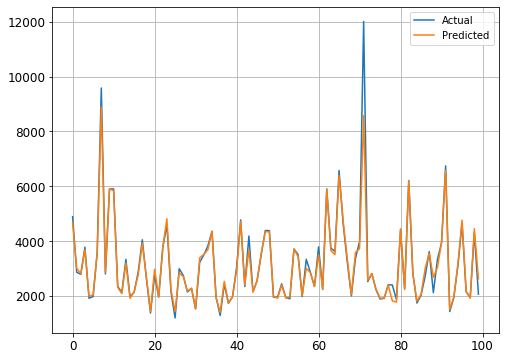

In [28]:
pd.DataFrame({"Actual":y_test.values[:100].flatten(),'Predicted':RF_pred[:100].flatten()}).plot(figsize=(8,6),fontsize=12)#plotting actual and predicted values
plt.grid()

In [29]:
print('MAE:',mean_absolute_error(y_test,RF_pred))

MAE: 177.1982596685083


In [32]:
print('MSE:',mean_squared_error(y_test,RF_pred))

MSE: 306391.8510792818


In [33]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,RF_pred)))

RMSE: 553.5267392631379


## Test data file

In [28]:
test_data = pd.read_csv('test_cabbage_price.csv')

In [29]:
test_data.head()

,year,avgTemp,minTemp,maxTemp,rainFall
0,20130101,-3.2,-9.1,2.6,2.0
1,20130102,-6.0,-11.2,0.0,0.4
2,20130103,-9.9,-13.9,-5.1,0.0
3,20130104,-9.0,-14.7,-1.9,0.0
4,20130105,-5.9,-13.1,1.0,0.0


In [30]:
test_data['year'] = test_data['year'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [31]:
test_data['Day'] = test_data.year.dt.day
test_data['Month'] = test_data.year.dt.month
test_data['Quarter'] = test_data.year.dt.quarter
test_data['Year'] = test_data.year.dt.year

In [32]:
test_data.head()

,year,avgTemp,minTemp,maxTemp,rainFall,Day,Month,Quarter,Year
0,2013-01-01,-3.2,-9.1,2.6,2.0,1,1,1,2013
1,2013-01-02,-6.0,-11.2,0.0,0.4,2,1,1,2013
2,2013-01-03,-9.9,-13.9,-5.1,0.0,3,1,1,2013
3,2013-01-04,-9.0,-14.7,-1.9,0.0,4,1,1,2013
4,2013-01-05,-5.9,-13.1,1.0,0.0,5,1,1,2013


In [33]:
test_data.drop('year',axis=1,inplace=True)

In [34]:
test_data.head()

,avgTemp,minTemp,maxTemp,rainFall,Day,Month,Quarter,Year
0,-3.2,-9.1,2.6,2.0,1,1,1,2013
1,-6.0,-11.2,0.0,0.4,2,1,1,2013
2,-9.9,-13.9,-5.1,0.0,3,1,1,2013
3,-9.0,-14.7,-1.9,0.0,4,1,1,2013
4,-5.9,-13.1,1.0,0.0,5,1,1,2013


In [36]:
test_pred=RF.predict(test_data)

Text(0.5, 1.0, 'Predicted Price')

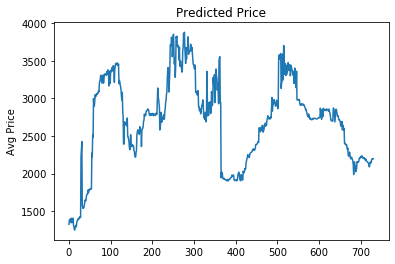

In [79]:
pd.Series(RF.predict(test_data)).plot()
plt.ylabel('Avg Price')
plt.title('Predicted Price')b

In [44]:
submit = pd.read_csv('sample_submit.csv',index_col='Id')

In [45]:
submit

,Expected
Id,
0,2000
1,2000
2,2000
3,2000
4,2000
...,...
726,2000
727,2000
728,2000


In [46]:
mean_squared_error(test_pred,submit.values)

833172.4255689468

In [47]:
np.sqrt(mean_squared_error(test_pred,submit.values))

912.7827921082577

In [48]:
mean_absolute_error(test_pred,submit.values)

780.2998495212038